# Plotting the glide

Similarly to R, you can plot the glide in Python with a smoother curve using interpolation.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import numpy as np

Load the data, here is a sample.

In [70]:
data = {
    'percent': ['20', '35', '50', '65', '80'],
    'avg_F1': [630.460714285714, 701.451530612245, 718.709948979592, 673.29387755102, 585.155612244898],
    'avg_F2': [1259.61964285714, 1279.09744897959, 1339.69285714286, 1447.32295918367, 1554.85943877551]
}

This line of code creates a new pandas DataFrame called df_Chris_avg using the data provided in the variable named data.

In [71]:
df_Chris_avg = pd.DataFrame(data)

In [72]:
color_mapping = {
    '20': '#344A9A',
    '35': '#00a082',
    '50': '#FF5733',
    '65': '#D4AC0D',
    '80': '#28B463'
}

This code prepares for creating a smooth cubic spline curve of the avg_F1 versus avg_F2 relationship from the df_Chris_avg DataFrame.

Interpolation is a method of estimating values between two known values. Imagine you have a graph with some data points on it. If you wanted to estimate the value at a point between two known data points, you would use interpolation.

Linear Interpolation: This is the simplest form of interpolation. In this method, two adjacent points are connected with a straight line, and the value at any point between them is estimated from this line. The formula for linear interpolation between two points is

$$
y = y_1 + \frac{(x - x_1) (y_2 - y_1)}{x_2 - x_1}
$$

Polynomial/Cubic Interpolation: Here, data points are fitted using a polynomial or a cubic function. This method can provide a smoother curve than linear interpolation, especially when data points have a more complex underlying function. The formula:

$$
S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3
$$

In [73]:
# Cubic interpolation
f1_interpolation = interp1d(df_Chris_avg['avg_F2'], df_Chris_avg['avg_F1'], kind='cubic')
f2_range = np.linspace(df_Chris_avg['avg_F2'].min(), df_Chris_avg['avg_F2'].max(), 500)

In [74]:
# Plot
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Finally, the plot.

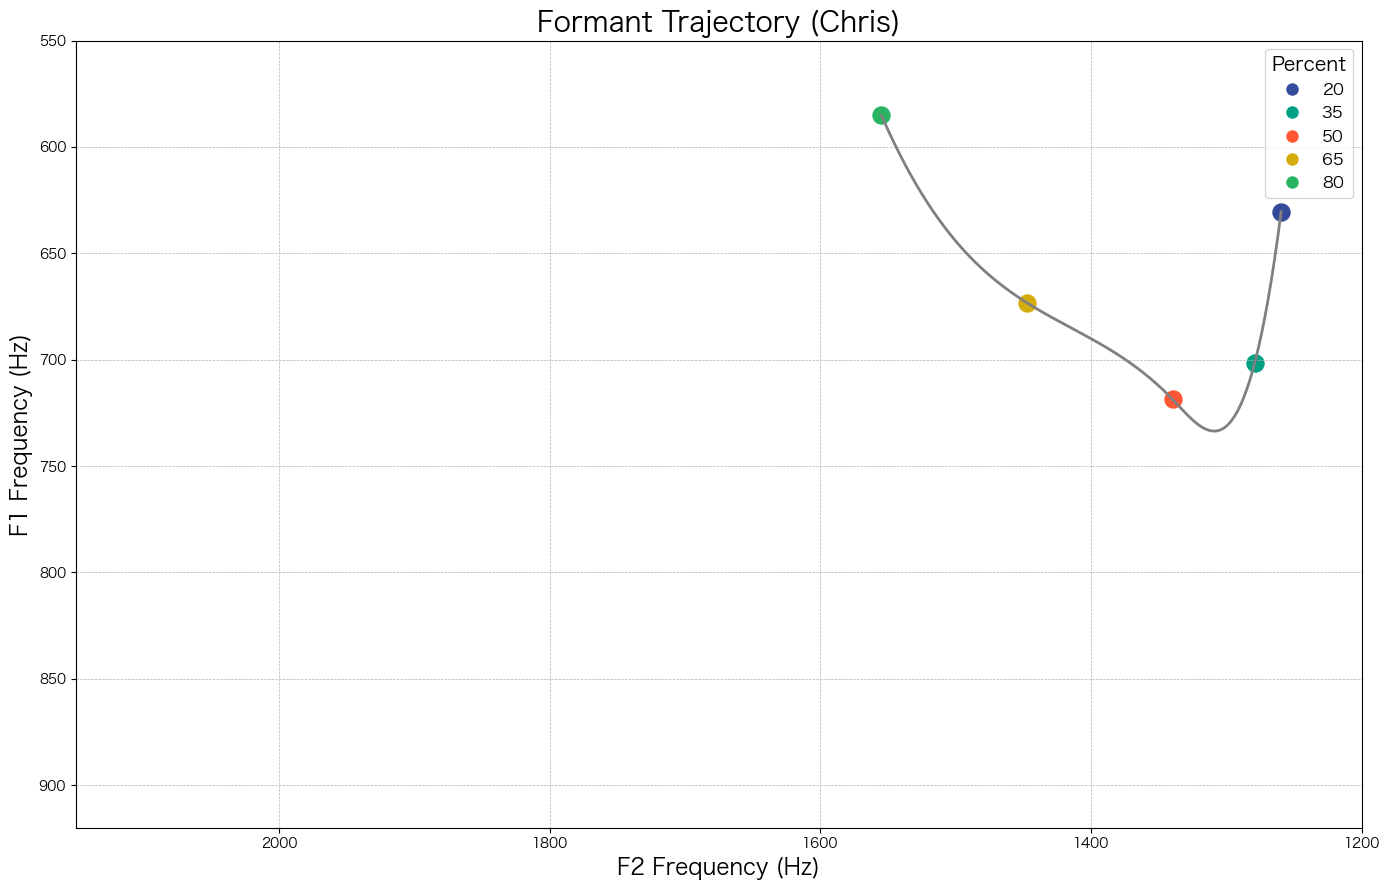

In [75]:
# Set a global font for your plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['.Aqua Kana']  # or 'Arial', 'sans-serif', etc.

# Adjust figure size
fig, ax = plt.subplots(figsize=(14, 9))  # Adjust as needed

# Plot smooth curve with adjusted line width
ax.plot(f2_range, f1_interpolation(f2_range), color='grey', linewidth=2)

# Add dots instead of arrowheads along the curve
for i, row in df_Chris_avg.iterrows():
    ax.scatter(row['avg_F2'], row['avg_F1'], color=color_mapping[row['percent']], s=150)  # s determines the size of the dots

# Aesthetics
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlim(2150, 1200)
ax.set_ylim(920, 550)
ax.set_title('Formant Trajectory (Chris)', fontsize=20)
ax.set_xlabel('F2 Frequency (Hz)', fontsize=16)
ax.set_ylabel('F1 Frequency (Hz)', fontsize=16)

# Adjust legend font size
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=perc, markersize=10, markerfacecolor=color) for perc, color in color_mapping.items()]
ax.legend(handles=legend_handles, title='Percent', fontsize=12, title_fontsize=14)

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adjust linestyle and linewidth as needed

plt.tight_layout()
plt.show()


Same plot but with arrows.

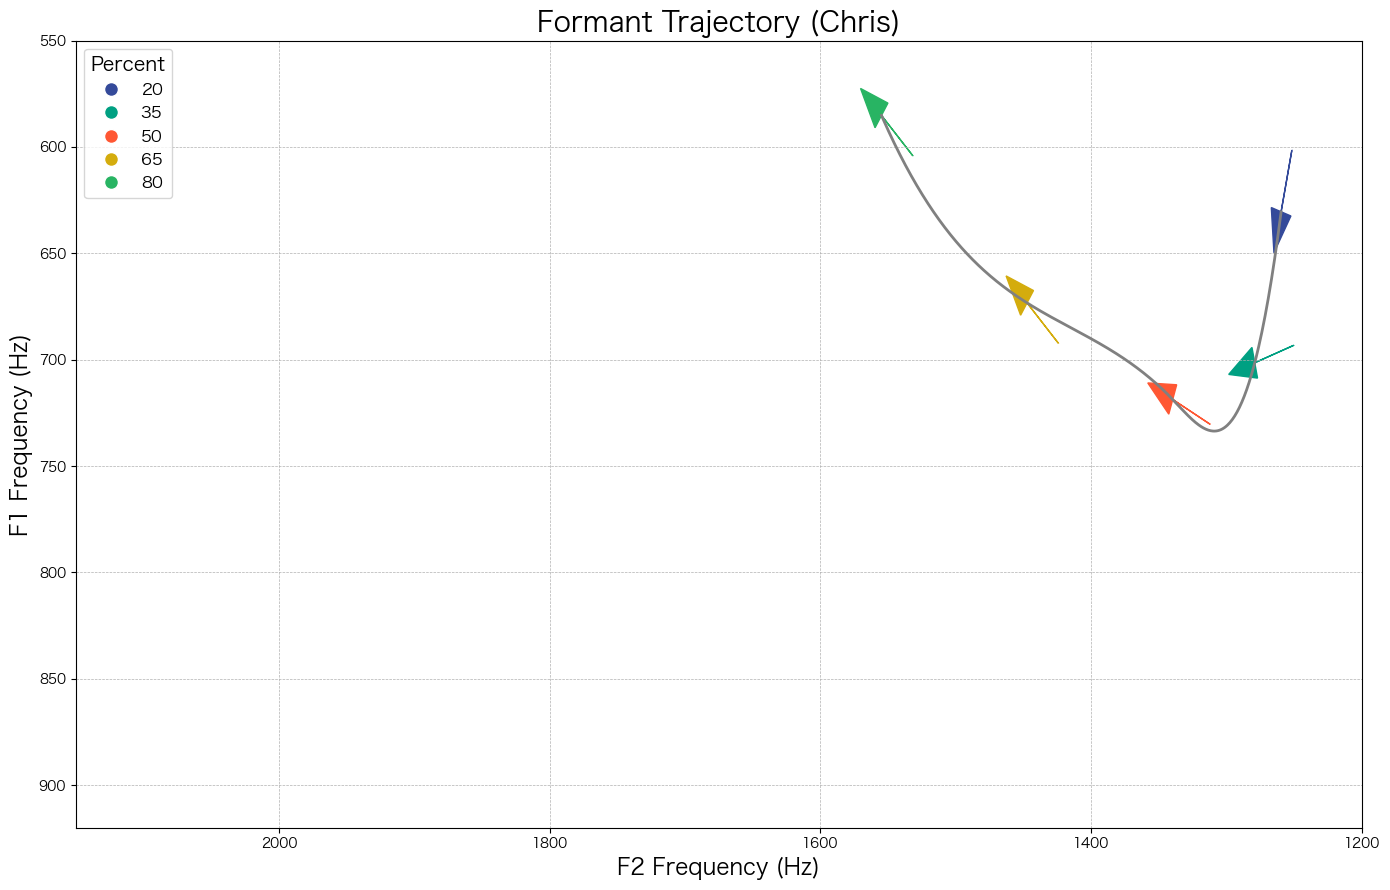

In [109]:
# Set a global font for your plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['.Aqua Kana']  # or 'Arial', 'sans-serif', etc.

# Adjust figure size
fig, ax = plt.subplots(figsize=(14, 9))  # Adjust as needed

# Plot smooth curve with adjusted line width
ax.plot(f2_range, f1_interpolation(f2_range), color='grey', linewidth=2)

# Compute the differences
df_Chris_avg['dF2'] = df_Chris_avg['avg_F2'].diff().shift(-1)
df_Chris_avg['dF1'] = df_Chris_avg['avg_F1'].diff().shift(-1)

# Handle the last point by making it the same as the second-to-last
df_Chris_avg.at[df_Chris_avg.index[-1], 'dF2'] = df_Chris_avg['dF2'].iloc[-2]
df_Chris_avg.at[df_Chris_avg.index[-1], 'dF1'] = df_Chris_avg['dF1'].iloc[-2]

arrow_length = 30  # Adjust as needed for the appropriate arrow length

# Normalize the differences to make them unit vectors
magnitude = (df_Chris_avg['dF2']**2 + df_Chris_avg['dF1']**2)**0.5
df_Chris_avg['dF2_normalized'] = df_Chris_avg['dF2'] / magnitude
df_Chris_avg['dF1_normalized'] = df_Chris_avg['dF1'] / magnitude

for i, row in df_Chris_avg.iterrows():
    # Use the normalized differences to set arrow direction
    dx = row['dF2_normalized'] * arrow_length
    dy = row['dF1_normalized'] * arrow_length
    
    # Adjust the start point for the arrow so only the head is plotted
    ax.arrow(row['avg_F2'] - dx, row['avg_F1'] - dy, dx, dy, 
             head_width=15, 
             head_length=20, 
             fc=color_mapping[row['percent']], 
             ec=color_mapping[row['percent']])



# Aesthetics
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlim(2150, 1200)
ax.set_ylim(920, 550)
ax.set_title('Formant Trajectory (Chris)', fontsize=20)
ax.set_xlabel('F2 Frequency (Hz)', fontsize=16)
ax.set_ylabel('F1 Frequency (Hz)', fontsize=16)

# Adjust legend font size
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=perc, markersize=10, markerfacecolor=color) for perc, color in color_mapping.items()]
ax.legend(handles=legend_handles, title='Percent', fontsize=12, title_fontsize=14)

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adjust linestyle and linewidth as needed

plt.tight_layout()
plt.show()

And the same with modified arrowheads.

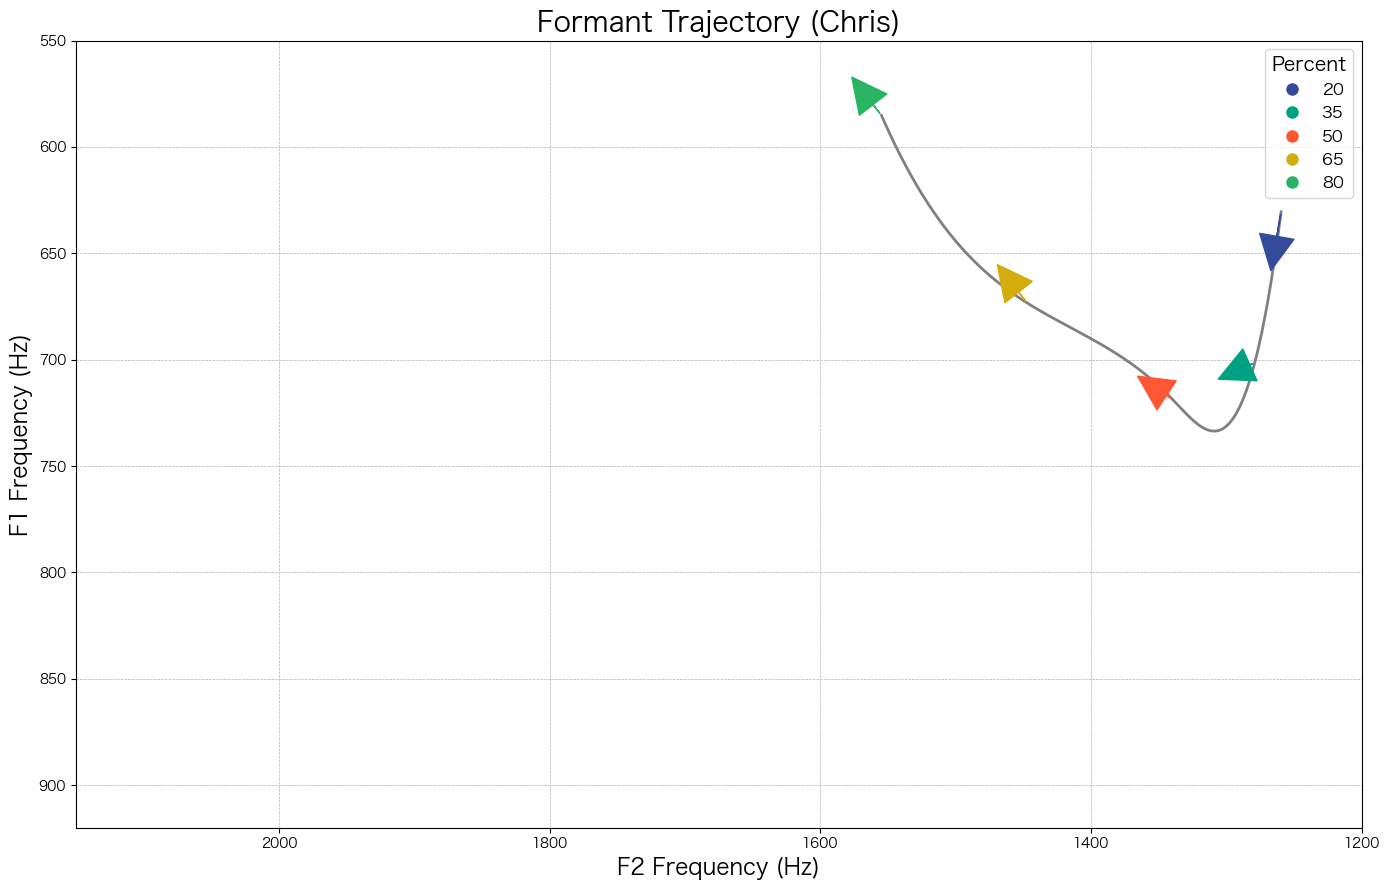

In [145]:
# Set a global font for your plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['.Aqua Kana']  # or 'Arial', 'sans-serif', etc.

# Adjust figure size
fig, ax = plt.subplots(figsize=(14, 9))  # Adjust as needed

# Plot smooth curve with adjusted line width
ax.plot(f2_range, f1_interpolation(f2_range), color='grey', linewidth=2)

# Compute the differences
df_Chris_avg['dF2'] = df_Chris_avg['avg_F2'].diff().shift(-1)
df_Chris_avg['dF1'] = df_Chris_avg['avg_F1'].diff().shift(-1)

# Handle the last point by making it the same as the second-to-last
df_Chris_avg.at[df_Chris_avg.index[-1], 'dF2'] = df_Chris_avg['dF2'].iloc[-2]
df_Chris_avg.at[df_Chris_avg.index[-1], 'dF1'] = df_Chris_avg['dF1'].iloc[-2]

arrow_length = 30  # Adjust as needed for the appropriate arrow length

# Normalize the differences to make them unit vectors
magnitude = (df_Chris_avg['dF2']**2 + df_Chris_avg['dF1']**2)**0.5
df_Chris_avg['dF2_normalized'] = df_Chris_avg['dF2'] / magnitude
df_Chris_avg['dF1_normalized'] = df_Chris_avg['dF1'] / magnitude

for i, row in df_Chris_avg.iterrows():
    # Use the normalized differences to set arrow direction
    dx = -row['dF2_normalized'] * arrow_length
    dy = -row['dF1_normalized'] * arrow_length
    
    endx = row['avg_F2'] - dx
    endy = row['avg_F1'] - dy
    
    # Using annotate to draw the arrow
    ax.annotate("", xy=(endx, endy), xytext=(row['avg_F2'], row['avg_F1']),
                arrowprops=dict(arrowstyle="Simple,tail_width=0,head_width=2.5,head_length=2.5", 
                                fc=color_mapping[row['percent']], ec=color_mapping[row['percent']]))


# Aesthetics
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlim(2150, 1200)
ax.set_ylim(920, 550)
ax.set_title('Formant Trajectory (Chris)', fontsize=20)
ax.set_xlabel('F2 Frequency (Hz)', fontsize=16)
ax.set_ylabel('F1 Frequency (Hz)', fontsize=16)

# Adjust legend font size
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=perc, markersize=10, markerfacecolor=color) for perc, color in color_mapping.items()]
ax.legend(handles=legend_handles, title='Percent', fontsize=12, title_fontsize=14)

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adjust linestyle and linewidth as needed

plt.tight_layout()
plt.show()




The same plot in R.




![The same plot in R](glide_chris.png)

In [56]:
import matplotlib.font_manager
sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))

['.Aqua Kana',
 '.Keyboard',
 '.New York',
 '.SF Arabic',
 '.SF Arabic Rounded',
 '.SF Compact',
 '.SF Compact Rounded',
 '.SF NS Mono',
 '.SF NS Rounded',
 '.ThonburiUI',
 'Academy Engraved LET',
 'Al Bayan',
 'Al Nile',
 'Al Tarikh',
 'American Typewriter',
 'Andale Mono',
 'Apple Braille',
 'Apple Chancery',
 'Apple SD Gothic Neo',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial Black',
 'Arial Hebrew',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Athelas',
 'Avenir',
 'Avenir Next',
 'Avenir Next Condensed',
 'Ayuthaya',
 'Baghdad',
 'Bangla MN',
 'Bangla Sangam MN',
 'Baskerville',
 'Beirut',
 'Big Caslon',
 'Bodoni 72',
 'Bodoni 72 Oldstyle',
 'Bodoni 72 Smallcaps',
 'Bodoni Ornaments',
 'Bradley Hand',
 'Brush Script MT',
 'Chalkboard',
 'Chalkboard SE',
 'Chalkduster',
 'Charis SIL',
 'Charter',
 'Cochin',
 'Comic Sans MS',
 'Copperplate',
 'Corsiva Hebrew',
 'Courier',
 'Courier New',
 'DIN Alternate',
 'DIN Condensed',
 'Damascus',
 '